<div style="border:solid green 2px; padding: 20px">
Александр, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать.

Ты уже проделал(а) большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ментора:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>
    <br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора:
</b> Так будут выделены итоговые комментарии.
</div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info">
<b> Комментарий студента:

# Прогнозирование оттока клиентов оператора связи

# Описание проекта
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. 

# Описание услуг
Оператор предоставляет два основных типа услуг: <br><br>

- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic). <br><br>

Также доступны такие услуги:<br><br>

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).<br><br>

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:<br>
- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.<br><br>

Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

## Импорт библиотек

In [1]:
!pip install phik -q
!pip install imblearn -q
!pip install shap -q

In [2]:
# Добавление нужных библиотек:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder

from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

from catboost import CatBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier


from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.metrics import make_scorer, precision_score

import phik
from phik.report import plot_correlation_matrix

import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import shap

## Загрузка данных

In [3]:
contract = pd.read_csv('/datasets/contract_new.csv', index_col=['customerID'],
                          parse_dates=['BeginDate', 'EndDate'])
personal = pd.read_csv('/datasets/personal_new.csv', index_col='customerID')
internet = pd.read_csv('/datasets/internet_new.csv', index_col='customerID')
phone = pd.read_csv('/datasets/phone_new.csv', index_col='customerID')

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично! Данные на базе! </div>

## Предварительный анализ

### contract

In [4]:
contract.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 440.2+ KB


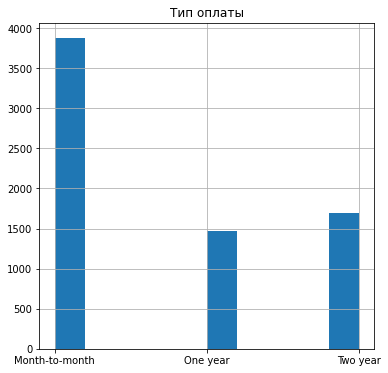

In [6]:
contract['Type'].hist(figsize=(6,6))
plt.title('Тип оплаты');

Чаще всего клиенты выбирают помесячную оплату

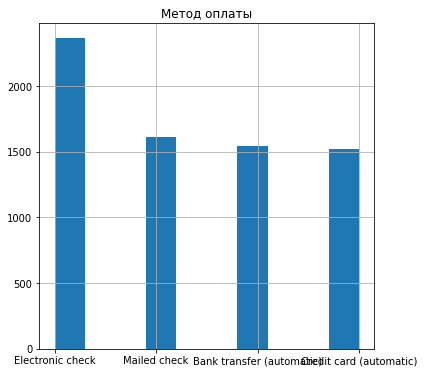

In [7]:
contract['PaymentMethod'].hist(figsize=(6,6))
plt.title('Метод оплаты');

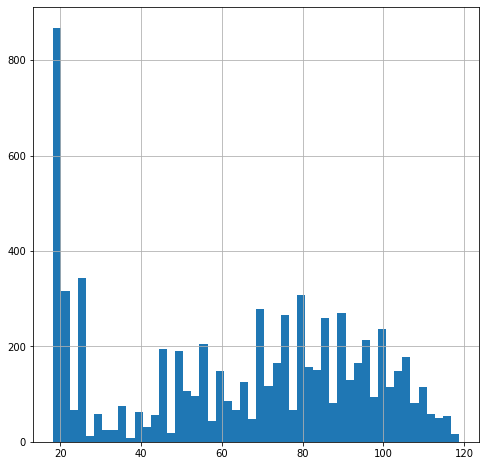

In [8]:
contract['MonthlyCharges'].hist(bins=50, figsize=(8,8));

In [9]:
contract.query('TotalCharges == " "')

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,


In [10]:
# Пропуски заполню максимальной датой актуальности договоров
contract['Churn'] = (contract['EndDate'] != 'No').astype(int)
contract['EndDate'] = contract['EndDate'].where(contract['EndDate'] != 'No', '2020-02-01')
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

contract.loc[contract['TotalCharges'] == " ", 'TotalCharges'] = 0
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично! Целевой признак определен корректно! С TotalCharges согласен </div>

### personal

In [11]:
personal.head()

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


In [12]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


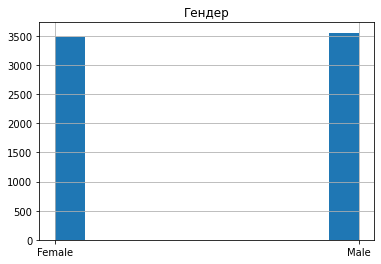

In [13]:
personal['gender'].hist()
plt.title('Гендер');

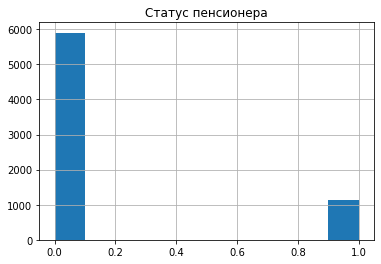

In [14]:
personal['SeniorCitizen'].hist()
plt.title('Статус пенсионера');

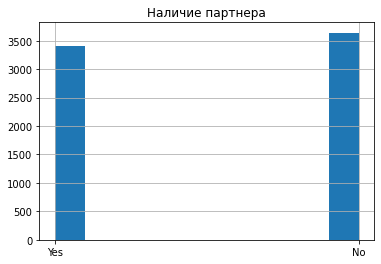

In [15]:
personal['Partner'].hist()
plt.title('Наличие партнера');

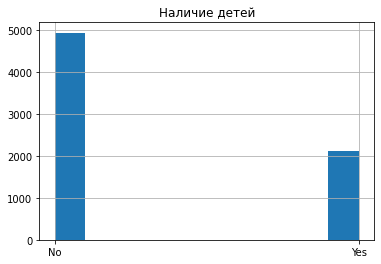

In [16]:
personal['Dependents'].hist()
plt.title('Наличие детей');

### internet

In [17]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


In [18]:
column_internet_list = list(internet.columns)

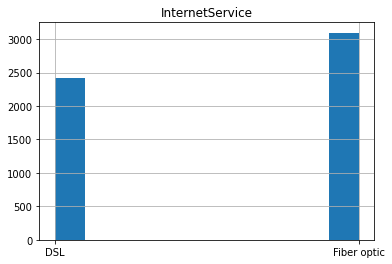

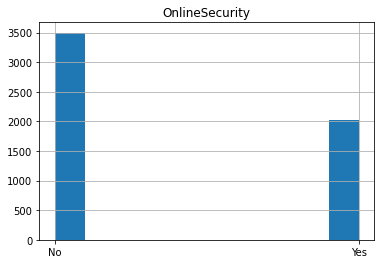

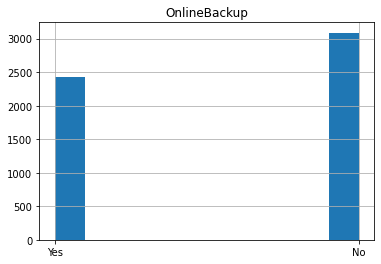

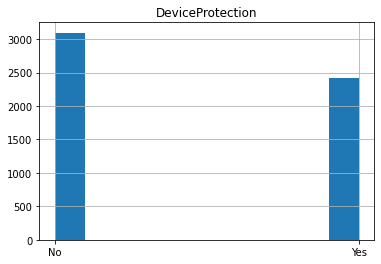

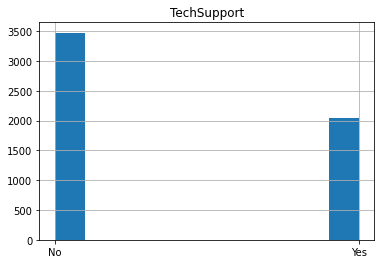

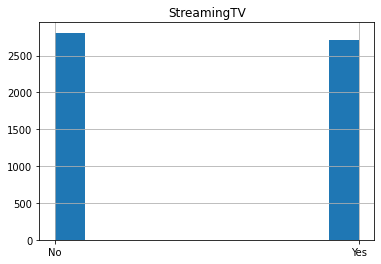

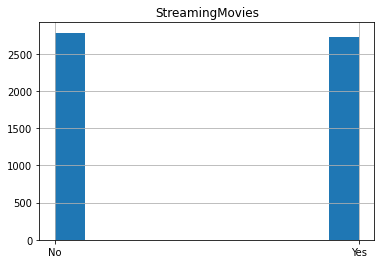

In [19]:
for name in column_internet_list:
    internet[name].hist()
    plt.title(name)
    plt.show()

### phone 

In [20]:
phone.head()

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


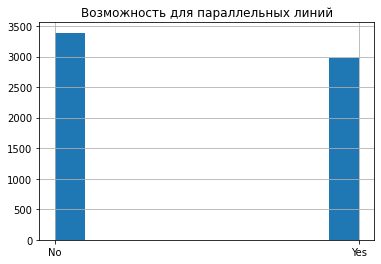

In [21]:
phone['MultipleLines'].hist()
plt.title('Возможность для параллельных линий');

### Вывод:
1. В столбце TotalCharges были замечены ошибки в данных (символ пробела)
2. Для EndDate указана последняя дата актуального действия договоров
3. В остальном данные в нужном формате. <br><br>

Предварительно от некоторых признаков придется избавиться из-за неинформативности для модели:<br>
1. Даты начала и конца действия договора. Из даты конца создал новый признак - ушел клиент или остался.
2. Добавим период жизни клиента

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отлично!  </div>

## Предобработка 

In [22]:
# Период жизни клиента
contract['Period'] = (contract['EndDate'] - contract['BeginDate']).dt.days

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Отличный признак!  </div>

In [23]:
# Добавлю признак пользования конкретными услугами, чтобы идентифицировать перед слиянием данных
internet['Internet'] = 1
phone['Phone'] = 1

In [24]:
df = contract.copy()
df = df.join(personal)
df = df.join(internet)
df = df.join(phone)

In [25]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Period,gender,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Internet,MultipleLines,Phone
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,...,DSL,No,Yes,No,No,No,No,1.0,NaN,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,...,DSL,Yes,No,Yes,No,No,No,1.0,No,1.0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,...,DSL,Yes,Yes,No,No,No,No,1.0,No,1.0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,...,DSL,Yes,No,Yes,Yes,No,No,1.0,NaN,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,...,Fiber optic,No,No,No,No,No,No,1.0,No,1.0


In [26]:
df.isna().sum()

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
Period                 0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
Internet            1526
MultipleLines        682
Phone                682
dtype: int64

In [27]:
df['Phone'] = df['Phone'].fillna(0)
df = df.fillna('No')

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b> Хорошо!  </div>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Churn             7043 non-null   int64         
 8   Period            7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity

In [29]:
# Удаляем все излишки:
del df['BeginDate']
del df['EndDate'] 

In [30]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['MultipleLines'] = df['MultipleLines'].astype(str)

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b>Хорошее решение! MultipleLines уже имеет тип object, можно было его не трогать
</div>

## Исследовательский анализ

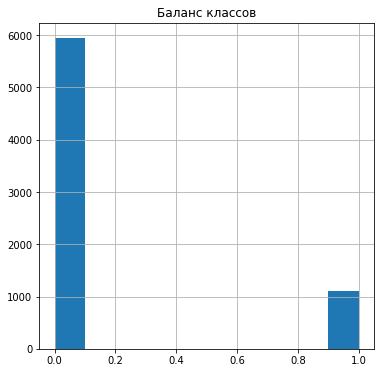

In [31]:
df['Churn'].hist(figsize=(6,6))
plt.title('Баланс классов');

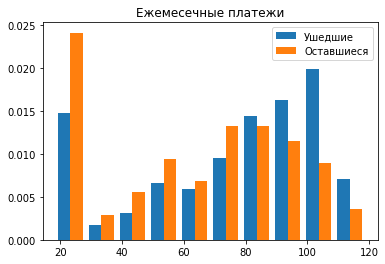

In [32]:
plt.hist([df[df['Churn'] == 1]['MonthlyCharges'], df[df['Churn'] == 0]['MonthlyCharges']], 
         label=['Ушедшие', 'Оставшиеся'], density=True)
plt.legend()
plt.title('Ежемесечные платежи')
plt.show();

In [33]:
col_list = list(df.columns)
col_list.remove('Churn')
col_list.remove('Internet')

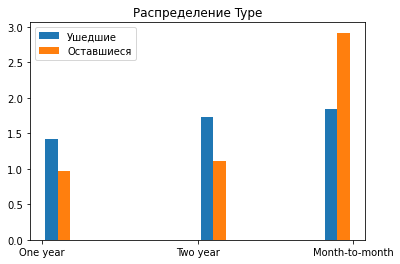

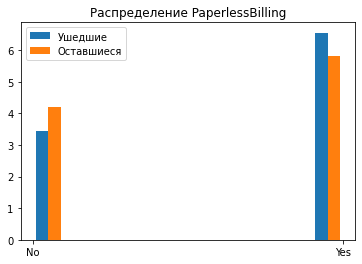

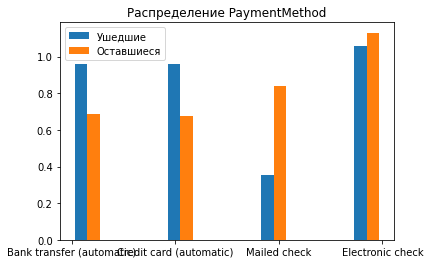

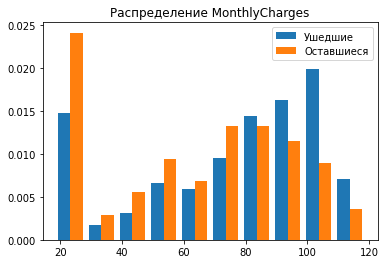

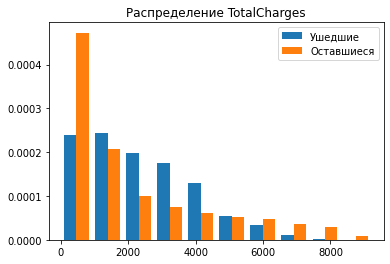

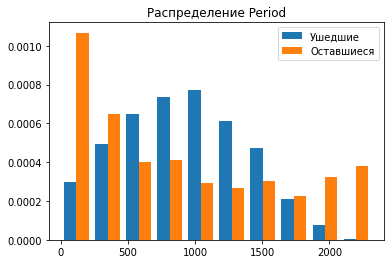

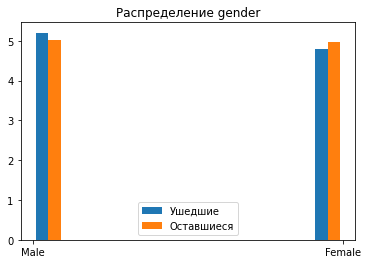

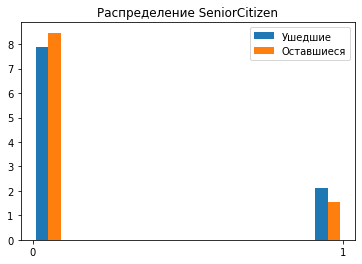

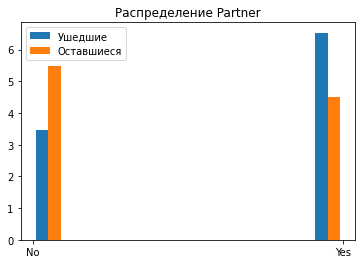

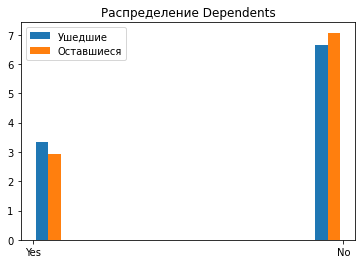

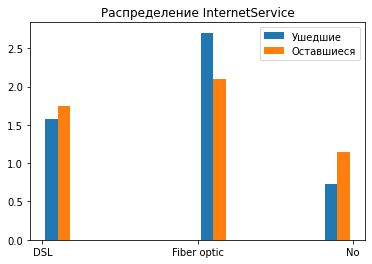

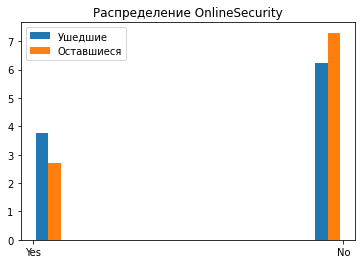

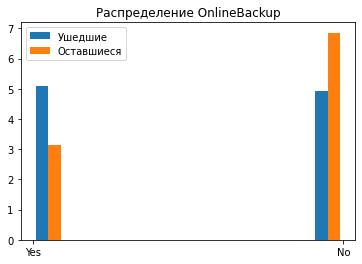

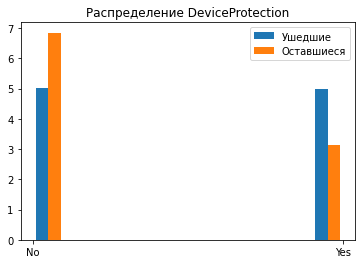

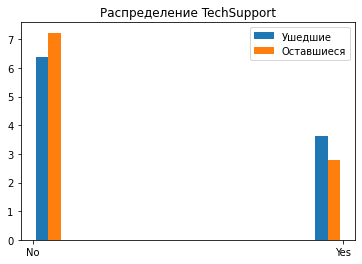

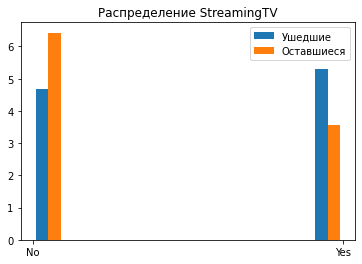

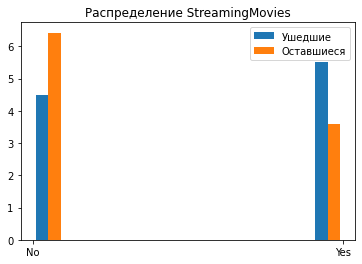

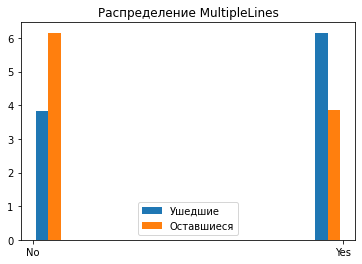

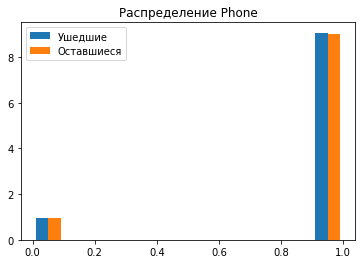

In [34]:
for name in col_list:
    plt.hist([df[df['Churn'] == 1][name], df[df['Churn'] == 0][name]], 
         label=['Ушедшие', 'Оставшиеся'], density=True)
    plt.legend()
    plt.title(f'Распределение {name}')
    plt.show();

<div class="alert alert-danger">
<b>Комментарий ментора: &#10060; </b> Хорошо, но давай проанализируем все признаки после объединения выборок </div>

- Видно что плоность ушедших клиентов больше у клиентов, у которых ежемесечный платеж от 70 до 100
- Уход от типа подписки особо не зависит
- Меньше всего клиенты уходят при получении чека на почту
- Чем меньше общие траты клиента, тем чаще уходят
- Чаще отказываются от подписки пользователи Антивируса и облачного хранилища
- Пользователи стримингового ТВ чаще отказываются от подписки

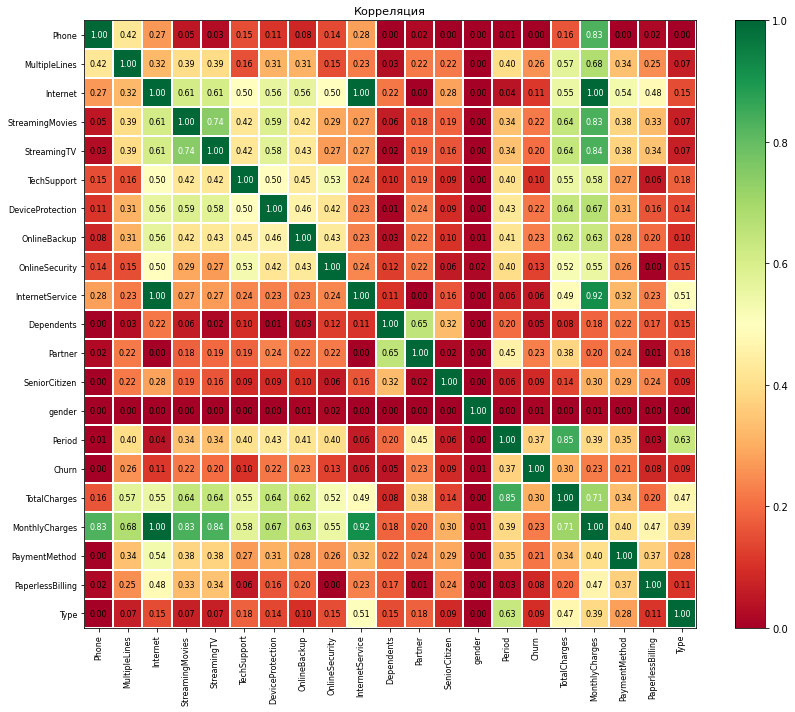

In [35]:
phik_matrix = df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'Period'])
phik_matrix.round(2)

plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1,
                        title="Корреляция", 
                        fontsize_factor=0.8, 
                        figsize=(12, 10))
plt.tight_layout()
plt.show()


### Вывод:
1. Очень слабая связь с целевым признаком у признаков Phone, gender.
2. Слабая связь с MultipleLines, StreamingMovies, StreamingTV, DeviceProtection, OnlineBackup. 
3. Присутствует дисбаланс классов

## Подготовка данных к обучению

Поиск гиперпараметров лучшей модели буду определять по RandomizedSearchCV. Метрика качества - ROC AUC >= 85%.

In [36]:
RANDOM_STATE = 240225

In [37]:
num_col = ['MonthlyCharges', 'TotalCharges', 'Period']
ohe_col = ['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner',
          'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Internet', 'MultipleLines', #'Phone', 'gender'
          ]

<div class="alert alert-success">
<b>Комментарий ментора:
&#9989;</b>Отлично!
</div>

In [38]:
features = df.drop(['Churn'
                    , 'Phone', 'gender'
                   ]
                    , axis=1)
target = df['Churn']

In [39]:
features[ohe_col] = features[ohe_col].astype(str)

In [40]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size = 0.25,
                                                                            random_state = RANDOM_STATE)

In [41]:
print(features_train.shape, target_train.shape,
      features_test.shape, target_test.shape)

(5282, 18) (5282,) (1761, 18) (1761,)


In [42]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 0824-VWDPO to 6128-CZOMY
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              5282 non-null   object 
 1   PaperlessBilling  5282 non-null   object 
 2   PaymentMethod     5282 non-null   object 
 3   MonthlyCharges    5282 non-null   float64
 4   TotalCharges      5282 non-null   float64
 5   Period            5282 non-null   int64  
 6   SeniorCitizen     5282 non-null   object 
 7   Partner           5282 non-null   object 
 8   Dependents        5282 non-null   object 
 9   InternetService   5282 non-null   object 
 10  OnlineSecurity    5282 non-null   object 
 11  OnlineBackup      5282 non-null   object 
 12  DeviceProtection  5282 non-null   object 
 13  TechSupport       5282 non-null   object 
 14  StreamingTV       5282 non-null   object 
 15  StreamingMovies   5282 non-null   object 
 16  Internet          5282 non-null 

In [43]:
#Pipeline для кодирования категориальных признаков
ohe_pipe = Pipeline(
#     [
#         ('simpleImputer_ohe', 
#          SimpleImputer(missing_values=np.nan, 
#                        strategy='most_frequent')), 
#         ('ohe', 
#          OneHotEncoder(drop='first', 
#                        handle_unknown='error', 
#                        sparse_output=False))
#     ]
# )
    [
        ('simpleImputer_ordinal', SimpleImputer(strategy='most_frequent')), 
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))  
    ]
)

In [44]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', 'passthrough')
])

In [45]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('num', num_pipe, num_col) 
    ], 
    remainder='passthrough'
)


In [46]:
# Итоговый Pipeline: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [47]:
param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'], 
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               LogisticRegression(random_state=RANDOM_STATE),
              #CatBoostClassifier(random_state = RANDOM_STATE)
              ]
}

In [48]:
param_distributions = [
    {
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': list(range(2, 15)),
        'models__max_leaf_nodes': list(range(2,15))
    },
    {
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10]  
    },
    {
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': list(range(1, 20))  
    },
    {
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models': [CatBoostClassifier()],
        'models__logging_level': [None, 'Silent'],
        'models__loss_function': [None, 'Logloss']
    },

]

## Обучение модели

In [49]:
rgrid = RandomizedSearchCV(
    pipe_final,
    param_distributions,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [50]:
rgrid.fit(features_train, target_train)

#вывод лучшей модели
print('Лучшая модель и её параметры:', rgrid.best_params_)

Лучшая модель и её параметры: {'preprocessor__num__scaler': 'passthrough', 'models__loss_function': 'Logloss', 'models__logging_level': 'Silent', 'models': <catboost.core.CatBoostClassifier object at 0x7fba7c71da90>}


In [51]:
print('Метрика ROC-AUC для лучшей модели:', round(rgrid.best_score_, 4)) 

Метрика ROC-AUC для лучшей модели: 0.8784


## Тестирование модели

In [52]:
rgrid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ordinal',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Internet',
                                                   'MultipleLines']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   'passthrough')]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges',
                                                   'Period'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x7fba7c572670>)])

In [53]:
predictions = rgrid.best_estimator_.predict(features_test)

In [54]:
y_pred_proba = rgrid.best_estimator_.predict_proba(features_test)[:, 1]

In [55]:
# Вычисляем ROC_AUC на тесте:
roc_auc = roc_auc_score(target_test, y_pred_proba)
print('AUC-ROC на тестовом наборе данных:', round(roc_auc, 4))

AUC-ROC на тестовом наборе данных: 0.9059


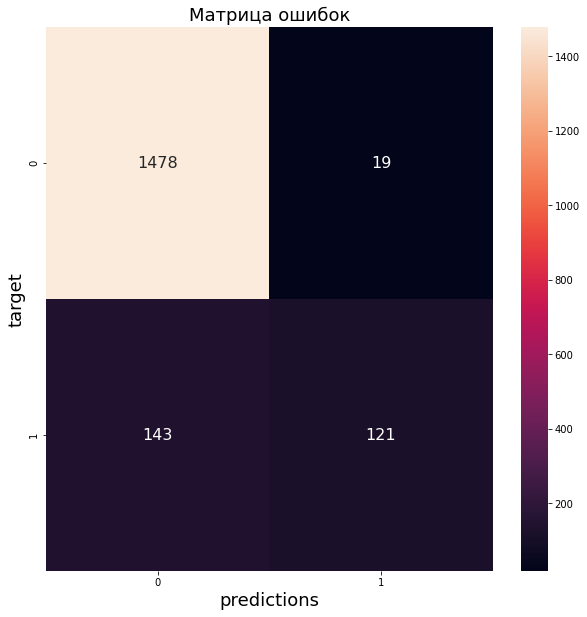

In [56]:
# Матрица ошибок:
cm = confusion_matrix(target_test, predictions)
cm_data = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, xticklabels=cm_data.columns, yticklabels=cm_data.index, annot=True, fmt='g', annot_kws={"size": 16})
plt.title("Матрица ошибок", size=18)
plt.xlabel('predictions', size=18)
plt.ylabel('target', size=18);

In [57]:
best_model = rgrid.best_estimator_

In [58]:
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

if hasattr(best_model.named_steps['models'], 'feature_importances_'):
    feature_importances = best_model.named_steps['models'].feature_importances_
    
    import pandas as pd
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    print("Важности признаков:")
    print(feature_importance_df)
else:
    print("Модель не поддерживает feature_importances_.")

Важности признаков:
                  Feature  Importance
17            num__Period   41.293796
0               ohe__Type   10.153007
16      num__TotalCharges    8.933757
15    num__MonthlyCharges    8.651946
2      ohe__PaymentMethod    5.294962
4            ohe__Partner    4.380876
14     ohe__MultipleLines    3.573956
6    ohe__InternetService    3.378388
1   ohe__PaperlessBilling    2.251696
8       ohe__OnlineBackup    2.155645
12   ohe__StreamingMovies    1.792278
5         ohe__Dependents    1.635152
3      ohe__SeniorCitizen    1.540185
7     ohe__OnlineSecurity    1.267282
9   ohe__DeviceProtection    1.249060
10       ohe__TechSupport    1.014705
11       ohe__StreamingTV    0.885209
13          ohe__Internet    0.548099


In [59]:
fpr, tpr, thresholds = roc_curve(target_test, y_pred_proba)
auc_score = roc_auc_score(target_test, y_pred_proba)
print(f"AUC: {auc_score:.4f}")

AUC: 0.9059


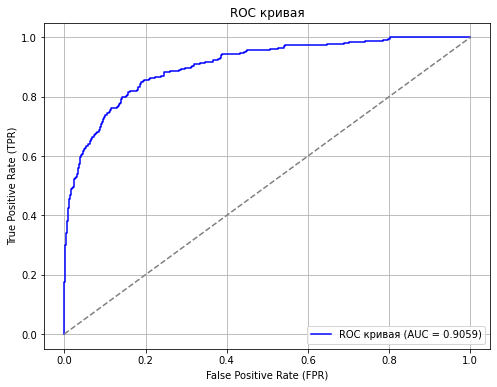

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC кривая (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [61]:
print(f'Метрика accuracy {accuracy_score(target_test, predictions)}')

Метрика accuracy 0.9080068143100511


### Вывод:
1. Результат предсказаний на тестовой выборке оказался 90%, что удовлетворяет условию >= 85%.
2. Построил матрицу ошибок и исследовали важность признаков. 
3. Модель лучше определяет тех, кто останется, нежели тех кто уйдет. Стоит отталкиваться от этого
4. Среди признаков видно явных лидеров, что влияют на отток: продолжительность оказания услуг, тип, общие траты и месячные траты.
5. Метрика точности показала 90.8%

## Итоговый вывод
1. Было получено 4 файла с информацией о клиентах телекома.<br><br>
- Произведена предобработка данных, в ходе которой были совершены следующие действия:
    - обработаны типы данных
    - добавлены новые признаки
    - заполнены пропуски
    - удалены лишние столбцы.
    - объединены исходные датафреймы
2. Была построена матрица корреляции, в ходе которой выяснилось, что между оттоком и признаками Phone, gender, MultipleLines, StreamingMovies, StreamingTV, DeviceProtection, OnlineBackup имеется слабая корреляция
3. В ходе работы были обучены 4 модели машинного обучения: CatBoostClassifier, KNeighborsClassifier, LogisticRegression, DecisionTreeClassifier.
4. Лучшей себя показала CatBoostClassifier показателем метрики ROC_AUC 0.9. Параметры модели:
    - Для текста был применен SimpleImputer (который заполнял пропуски наиболее частыми значениями) и OrdinalEncoder (кодирование строковых признаков)
    - Числовые данные не масштабировались
    - Так же для модели были подобраны гиперпараметры loss_function со значением 'Logloss' и logging_level со значением 'Silent', а так же random_state = 240225
5. Построил матрицу ошибок и исследовали важность признаков. Результаты следующие:
    - Модель хорошо справляется с определением тех, кто останется. С теми кто уйдет, она испытывает проблемы. Возможно из-за дисбаланса классов
    - продолжительность оказания услуг, тип, общие траты и месячные траты являются лидирующими признаками при оттоке
6. Метрика точности accuracy составила 90.8%
7. В качестве рекомендации стоит предлагать пользователям, которые по предсказанию модели могут уйти, некоторые скидки или дополнительные услуги. Например, скидка на определенный Type, чтобы вырастить длительность заключаемого договора - следовательно и длительность пользования услугами компании.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора V1:
</b> К сожалению наблюдаются признаки заимствования из чужих проектов<br>
    1. Пути ведут к старым выборкам<br>
    2. Графики <a href = "https://github.com/Bormatyha/data_science/blob/main/final_sprint.ipynb">Графики</a>,<a href = "https://github.com/Dymich/practicum_projects/blob/main/final_project.ipynb">Графики, пайплайн</a>
</div>

<div class="alert alert-info">
<b> Комментарий студента:</b><br>
    Категорически не могу согласиться со сделанными выводами касательно проделанной мною работы. Да, вижу похожие практики в построении пары графиков. В остальном схожести не вижу. Как минимум в использовании пайплайнов, как максимум в общем подходе к решению задачи. Прошу проверять по существу. Касательно инцедента я дополнительно сообщю куратору, тк это трата одной из моих итераций

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора V2:
</b> Ок, возможно наблюдались схожие техники, но в любом случае работа не может быть проверена, т.к. ты используешь старые датасеты(можешь подсказать, откуда ты их взял?). Так же советую посмотреть хотя бы презентацию, т.к. не все задачи были выполнены!
</div>

<div class="alert alert-info">
<b> Комментарий студента:</b><br>
    Изначально не получалось подгрузить данные, потому что не мог нащупать путь и потому попросил бывшего коллегу, ранее прошедшего курс, поделиться как это сделать. А проект я начинал делать еще до вебинара, где как раз был указа путь

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ментора V3:
</b> Понял! Ничего страшного тогда! Давай исправим пару моментов:<br>
    1.Анализ и визуализация всех признаков после объединения выборок и заполнения пропусков<br>
    2.В итоговом выводе стоит указать подобранные гиперпараметры итоговой модели(включая random_state) и признаки, на которых модель обучалась(включая их обработку - кодирование, масштабирование). В 4 пункте все-таки не точность, а площадь под ROC кривой<br>
    В целом все хорошо!
    
</div>